### Programming Assignment 2 Q1
### Unsupervised Learning

Group Number : 46

Student 1 : Aryan Singh 19CS30007

Student 2 : Seemant Guruprasad Achari 19CS30057


In [1]:
# importing various tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA


In [2]:
# To make outputs reproducible
np.random.seed(101)

In [3]:
# loading the dataset

df = pd.read_csv('lung-cancer.data', header = None, na_values=["?"])
df.columns += 1

In [4]:
print(df.head())

print("Dataset loaded successfully!")

   1   2   3   4    5   6   7   8   9   10  ...  48  49  50  51  52  53  54  \
0   1   0   3   0  NaN   0   2   2   2   1  ...   2   2   2   2   2   1   1   
1   1   0   3   3  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
2   1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
3   1   0   2   3  2.0   1   3   3   3   1  ...   2   2   2   2   2   2   2   
4   1   0   3   2  1.0   1   3   3   3   2  ...   2   2   2   2   2   2   2   

   55  56  57  
0   1   2   2  
1   1   2   2  
2   2   1   2  
3   2   2   2  
4   1   2   2  

[5 rows x 57 columns]
Dataset loaded successfully!


In [5]:
true_labels = df.iloc[:, :1]
X_train = df.iloc[:, 1:]

print("Label attribute separated")

Label attribute separated


In [6]:
for attr,value in X_train.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")

Attribute 5 has 4 missing data.
Attribute 39 has 1 missing data.


In [7]:
# Filling the na values with mode of the columns
fill_mode = lambda col: col.replace(np.nan, col.mode()[0])
x_without_na = X_train.apply(fill_mode, axis=0)

In [8]:
for attr,value in x_without_na.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")
print("Missing data handled using mode!")

Missing data handled using mode!


In [9]:
# Normalizing data 
scaled_data = (x_without_na-x_without_na.mean())/x_without_na.std()

In [10]:
print("-------------------------Task-1-Started---------------------------")
pca = PCA()
pca.fit(scaled_data)

-------------------------Task-1-Started---------------------------


PCA()

In [11]:
number_of_components = 0
total_variance_captured = 0

for variance in pca.explained_variance_ratio_:
    number_of_components += 1
    total_variance_captured += variance
    if(total_variance_captured > 0.95):
        break

print(f"{number_of_components} components of explained variance captured {total_variance_captured} variance")

21 components of explained variance captured 0.9533946229824255 variance


-------------------------Task-1-Finished--------------------------
-------------------------Task-2-Started---------------------------


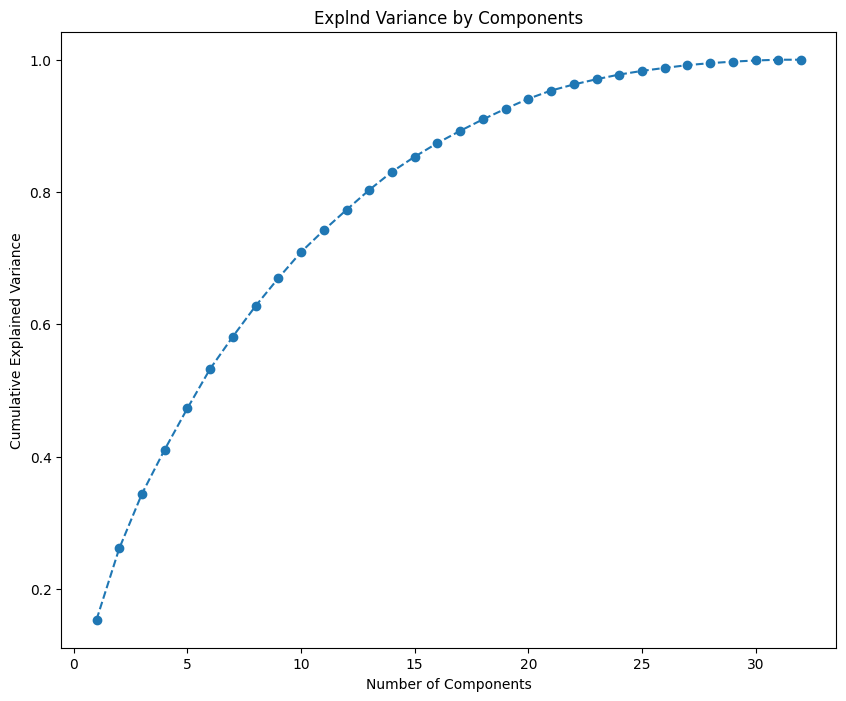

In [12]:
print("-------------------------Task-1-Finished--------------------------")
print("-------------------------Task-2-Started---------------------------")
plt.figure(figsize = (10,8))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explnd Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [13]:
print("-------------------------Task-2-Finished--------------------------")
# using the derived number of components
pca = PCA(n_components = number_of_components)
pca.fit(scaled_data)

-------------------------Task-2-Finished--------------------------


PCA(n_components=21)

In [14]:
scores_pca = pca.transform(scaled_data)

In [15]:
x_pca = pca.transform(scaled_data)

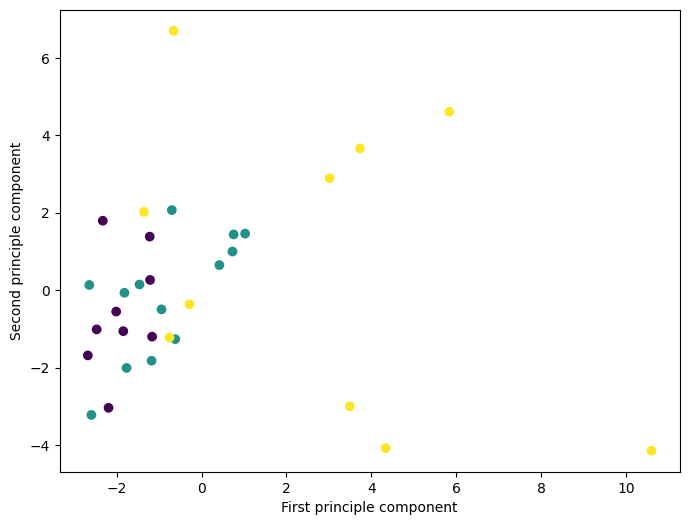

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=true_labels)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.show()

In [17]:
print("-------------------------Task-3-Started---------------------------")

# Helper function
def euclideanDistance(pt, data):
    '''
    Point has dimensions (m,), and data has dimensions (n, m)
    Function returns the Euclidean distance between data and point pt with the dimensions(n, ).
    '''
    return np.sqrt(np.sum((pt - data)**2, axis = 1))

-------------------------Task-3-Started---------------------------


#### K-Means Clustering Implementation

In [18]:
class KMeans:
    def __init__(self, num_clusters = 2, max_iters = 200):
        self.num_clusters = num_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        # Select random starting points from the uniform distribution over the domain of the dataset
        min_vals, max_vals = np.min(X, axis=0), np.max(X, axis=0)
        self.centroids = [np.random.uniform(min_vals, max_vals) for _ in range(self.num_clusters)]
        # Iterate until convergence or max_iters is reached
        iteration = 0
        old_centroids = None
        while np.not_equal(self.centroids, old_centroids).any() and iteration < self.max_iters:
            # Assign data to nearest centroid
            sorted_points = [[] for _ in range(self.num_clusters)]
            for x in X:
                dists = euclideanDistance(x, self.centroids)
                # Finding the nearest centroid
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Recalculating the mean centroids
            old_centroids = self.centroids
            for i, cluster in enumerate(sorted_points):
                if(len(cluster)>0):
                    self.centroids[i] = np.mean(cluster, axis=0)
                else:
                    self.centroids[i] = old_centroids[i]
            iteration += 1
    def getCluster(self, X):
        '''
        Returns the centroid and 
        corresponding centroid index 
        (can be interperated as class) 
        for each data points.
        '''
        centroids = []
        centroid_indexes = []
        for x in X:
            dists = euclideanDistance(x, self.centroids)
            centroid_index = np.argmin(dists)
            centroids.append(self.centroids[centroid_index])
            centroid_indexes.append(centroid_index)
        return centroids, centroid_indexes

In [19]:
# helper function to calculate the entropy
# Method to Calulate Total Entropy

# Input : Traning Data, label, classList

def calculateEntropy(trainData, label):
    classList = trainData[label].unique()
    totalCount = trainData.shape[0]

    totalEntropy = 0

    for c in classList:
        # Count the number of data points which satify == c class constraints
        totalClassCount = trainData[trainData[label] == c].shape[0]
        # Calulate the class's entropy
        classEntropy = 0
        prob = 0
        if(totalCount >0):
            prob = totalClassCount / totalCount
        if( prob >0):
            classEntropy = - (prob)*np.log2(prob)
        # Accumulate the class's entropy into the totalEntropy
        totalEntropy = totalEntropy + classEntropy
    
    return totalEntropy



def calculateEntropyGivenClusters(df_eval, classLabel, clusterLabel):
    # for each clusterLabel:
    #     calc P(cluster)
    #     calculate entropy of classLabel in df_eval[clusterLabel == cluster]

    totalEntropy = 0
    clusters = df_eval[clusterLabel].unique()
    totalCount = df_eval.shape[0]
    for cluster in clusters:
        df_cluster = df_eval[df_eval[clusterLabel] == cluster]
        clusterCount = df_cluster.shape[0]
        clusterProbability = 0
        if(totalCount > 0):
            clusterProbability = clusterCount / totalCount
        clusterEntropy = calculateEntropy(df_cluster, classLabel)
        totalEntropy += clusterProbability * clusterEntropy
    return totalEntropy
        


def calculateMutualInformation(df_eval, classLabel, clusterLabel, entropyClass):
    return entropyClass - calculateEntropyGivenClusters(df_eval, classLabel, clusterLabel)


In [20]:
def calculateNMI(df_eval, classLabel, clusterLabel):
    
    # entropy of Class
    entropyClass = calculateEntropy(df_eval, classLabel)

    # entropy of cluster
    entropyCluster = calculateEntropy(df_eval, clusterLabel)

    # Mutual Information b/w class and cluster
    I_yc = calculateMutualInformation(df_eval, classLabel, clusterLabel, entropyClass)

    # Calculating NMI
    nmi = (2*I_yc) / (entropyClass + entropyCluster)

    return nmi

In [21]:
# NMI Calculation

classLabel = "trueLabel"

clusterLabel = "clustered"

x_data = []
y_data = []
print(f"Started KMeans fitting")
for k in range(2, 9):
    kmeans = KMeans(num_clusters=k)
    kmeans.fit(x_pca)
    class_centers, classification = kmeans.getCluster(x_pca)
    
    data_dict = {
        # true labels
        classLabel : true_labels.iloc[:, 0],
        # kmean clusters
        clusterLabel : classification
    }
    df_eval = pd.DataFrame(data_dict)
    nmi = calculateNMI(df_eval, classLabel, clusterLabel)
    print(f"for k = {k}, NMI = {nmi}")
    x_data.append(k)
    y_data.append(nmi)
print(f"KMeans fitting finished for all k")

Started KMeans fitting
for k = 2, NMI = 0.0004887309814197579
for k = 3, NMI = 0.3838705208427554
for k = 4, NMI = 0.13142052694042242
for k = 5, NMI = 0.19846481850687905
for k = 6, NMI = 0.3610792667914908
for k = 7, NMI = 0.14329673309688376
for k = 8, NMI = 0.24698745548938442
KMeans fitting finished for all k


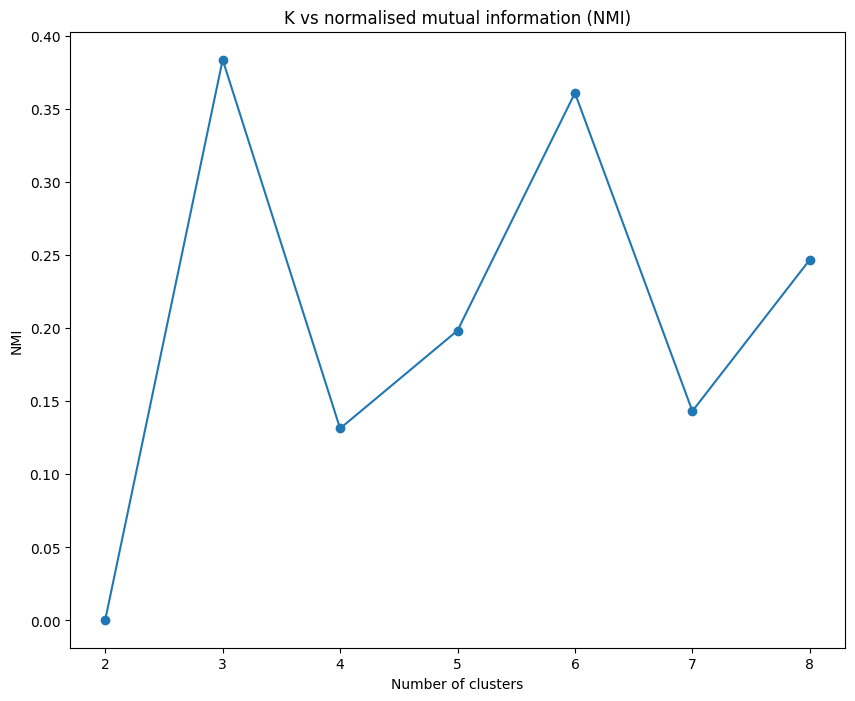

In [22]:
plt.figure(figsize = (10,8))
plt.plot(x_data, y_data, marker = 'o')
plt.title("K vs normalised mutual information (NMI)")
plt.xlabel("Number of clusters")
plt.ylabel("NMI")
plt.show()

In [23]:
print(f"k = {x_data[np.argmax(y_data)]} corresponds to max NMI = {np.max(y_data)}")
print("-------------------------Task-3-Finished--------------------------")


k = 3 corresponds to max NMI = 0.3838705208427554
-------------------------Task-3-Finished--------------------------
